Slope data exported to: /Users/harryfyjis-walker/Desktop/slope_data.xlsx


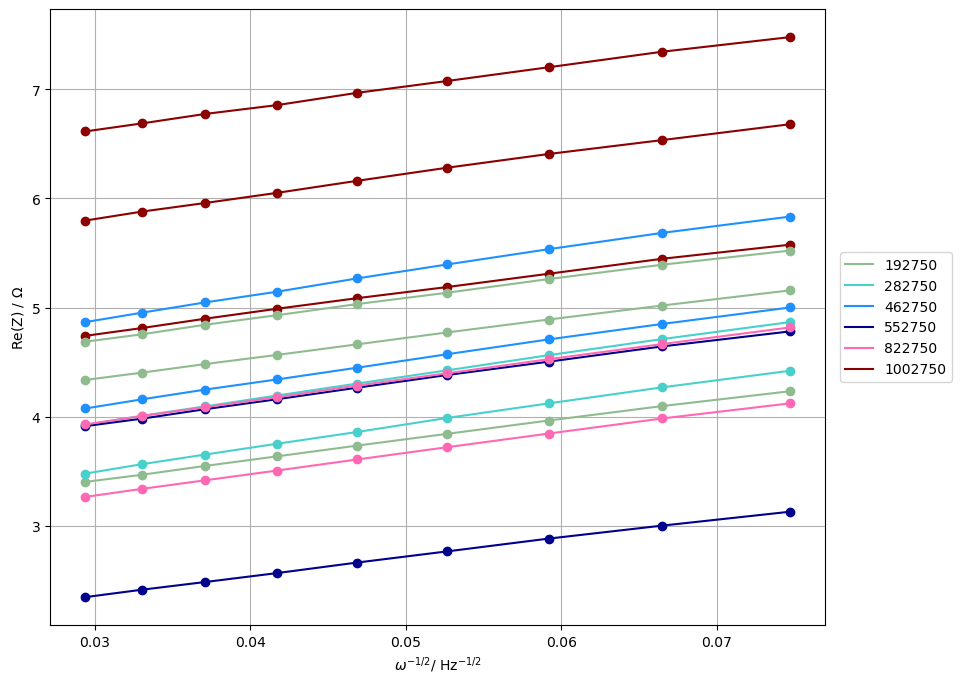

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# Define the directory where your text files are located
directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/EISall'

# Get a list of all text files in the directory
file_list = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

# Initialize a figure for the combined plot
plt.figure(figsize=(10, 8))

# Extract the six-number code from each filename using regular expressions
def extract_six_number_code(filename):
    match = re.search(r'\d+', filename)
    if match:
        return match.group()
    else:
        return None

# Sort the file list numerically based on the six-number code
sorted_file_list = sorted(file_list, key=extract_six_number_code) 

# Define colors based on six or seven consecutive numbers extracted from filenames
color_mapping = {
    '0102750': 'forestgreen',
    '192750': 'darkseagreen',
    '282750': 'mediumturquoise',
    '372750': 'skyblue',
    '462750': 'dodgerblue',
    '552750': 'darkblue',
    '642750': 'purple',
    '732750': 'violet',
    '822750': 'hotpink',
    '912750': 'crimson',
    '1002750': 'darkred',
}

slopes = []

# Define slicing ranges for each file
ranges = {
    '0102750': [33, 40],
    '192750': [29, 38],
    '282750': [29, 38],
    '372750': [35, 40],
    '462750': [29, 38],
    '552750': [29, 38],
    '642750': [25, 42],
    '732750': [29, 38],
    '822750': [29, 38],
    '912750': [29, 38],
    '1002750': [29, 38]
}

# Loop through each file and plot the data
for filename in sorted_file_list:
    six_number_code = extract_six_number_code(filename)
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, delimiter='\t')

    # Extract data from freqrecip and ReZ columns with specific slicing ranges
    freqrecip = df['freq/Hz'][ranges[six_number_code][0]:ranges[six_number_code][1]]
    ReZ = df['Re(Z)/Ohm'][ranges[six_number_code][0]:ranges[six_number_code][1]]

    # Calculate reciprocal of the square root of frequency
    recip_sqrt_freq = 1 / np.sqrt(freqrecip)

    # Plot the data for this file with the six-number code as the label and the assigned color
    plt.plot(recip_sqrt_freq, ReZ, marker='o', linestyle='-', label=six_number_code, color=color_mapping.get(six_number_code, 'black'))

    # Calculate the gradient (slope) of the best-fit line
    if len(recip_sqrt_freq) > 1:
        slope, _ = np.polyfit(recip_sqrt_freq, ReZ, 1)
        slopes.append(slope)  # Append the slope to the list

# Customize the plot
plt.xlabel('$\omega^{-1/2}$/ Hz$^{-1/2}$')
plt.ylabel('Re(Z) / $\Omega$')
plt.grid(True)

# Export slope data to an Excel file

# Define a custom sorting order for the six or seven number codes
custom_sort_order = {
    '0102750': 0,
    '192750': 1,
    '282750': 2,
    '372750': 3,
    '462750': 4,
    '552750': 5,
    '642750': 6,
    '732750': 7,
    '822750': 8,
    '912750': 9,
    '1002750': 10
}

# Create a DataFrame with the six-number codes and corresponding slopes
slope_data = pd.DataFrame({'Six_Number_Code': [extract_six_number_code(filename) for filename in sorted_file_list], 'Slope': slopes})

# Sort the DataFrame based on the custom sorting order
slope_data['Custom_Sort'] = slope_data['Six_Number_Code'].map(custom_sort_order)
slope_data = slope_data.sort_values(by='Custom_Sort').drop(columns='Custom_Sort')
excel_file_path = '/Users/harryfyjis-walker/Desktop/slope_data.xlsx'  # Specify the path where you want to save the Excel file
slope_data.to_excel(excel_file_path, index=False)

print("Slope data exported to:", excel_file_path)

custom_legend_mapping = {
    #'0102750': {'handle': plt.Line2D([], [], color='forestgreen'), 'color': 'forestgreen'},
    '192750': {'handle': plt.Line2D([], [], color='darkseagreen'), 'color': 'darkseagreen'},
    '282750': {'handle': plt.Line2D([], [], color='mediumturquoise'), 'color': 'mediumturquoise'},
    '462750': {'handle': plt.Line2D([], [], color='dodgerblue'), 'color': 'dodgerblue'},
    '552750': {'handle': plt.Line2D([], [], color='darkblue'), 'color': 'darkblue'},
    '822750': {'handle': plt.Line2D([], [], color='hotpink'), 'color': 'hotpink'},
    #'912750': {'handle': plt.Line2D([], [], color='crimson'), 'color': 'crimson'},
    '1002750': {'handle': plt.Line2D([], [], color='darkred'), 'color': 'darkred'}
}

# Create legend with custom mapping
handles = [entry['handle'] for entry in custom_legend_mapping.values()]
labels = custom_legend_mapping.keys()

plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.show()
